# <span id="chap_siomple_network"></span> Simple networks

When we looked at [lattices](concepts-networks.ipynb#sec_concepts_networks_lattice) we said that these were probably the simplest interesting networks we could imagine encountering. Actually we can broaden the concept of a "simple but still interesting" network a little by considering in a little more detail some of the ways in which nodes could be connected. We can then pick out a class of networks that are "simple" both mathematically and computationally, but which have shown themselves to be useful in a lot of cases. 

In [1]:
import cncp

import networkx
import numpy

import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import seaborn

/Users/sd/research/writing/complex-networks-complex-processes/notebook/cncp/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## <span id="sec_concepts_simple_network_undirected"></span> Undirected networks

When we defined what we mean by a network, we [said](concepts-networks.ipynb#chap_concepts_networks) that it consisted of nodes connected by edges. In the simplest case, all the edges are **undirected**, meaing they connect a pair of nodes with no preferred direction. Clearly this isn't appropriate for a lot of cases &ndash; modelling parent-child relationships without direction is clearly problematic, for example &ndash; but it turns out to be fine for a lot of interesting cases.

Some networks may include **directed** edges, where some (or all) of the edges have a preferred direction. In a social network this might include marriage relationships, which are "equal partnerships" and so don't have an obvious choice of direction in the way parenthood does.

If a network includes any directed edges, we refer to it as a **directed network**; otherwise we talk about **undirected networks**. The term "network" without qualification usually refers to an undirected network. 

We'll return to directed networks later.

## <span id="sec_concepts_simple_network_parallel"></span> Parallel edges

When we allowed edges to connect a pair of nodes, we didn't specify that each edge in the network connected a *different* pair. This leaves open the possibility of two edges connecting the same pair. Such edges are referred to as **parallel edges** since, if we drew the network, we would need a pair of lines between the pair of nodes.  

The `networkx.Graph` class doesn't allow parallel edges. We can try to create a network with them, for example:

In [2]:
g = networkx.Graph()
g.add_nodes_from([1, 2, 3])
g.add_edges_from([(1, 2), (1, 2), (2, 3)])

But if we then interrogate it, we'll find that the duplicate edge between nodes 1 and 2 has been ignored:

In [3]:
g.edges(1)

[(1, 2)]

There is another class, `networkx.MultiGraph`, that *does* allow parallel edges:

In [4]:
h = networkx.MultiGraph()
h.add_nodes_from([1, 2, 3])
h.add_edges_from([(1, 2), (1, 2), (2, 3)])
h.edges(1)

[(1, 2), (1, 2)]

But if we try to draw this network, we'll be disappointed:

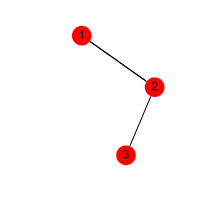

In [5]:
fig = plt.figure(figsize = (3, 3))
plt.gca().set_axis_off()

networkx.draw_networkx(h, node_size = 400)

_ = plt.show()

We can manipulate networks with parallel edges, but to draw them properly we'd need to write our own [layout code](concepts-geometry.ipynb) as we did when we wanted to lay-out the lattice in a particular way.

## <span id="sec_concepts_simple_network_selfloops"></span> Self-loops

Following on from the discussion of parallel edges, we *also* didn't specify that the pair of of nodes connected by an edge were two *different* nodes. This would mean we could have an edge whose endpoints were the same &ndash; and, by implication, that the node was adjacent to itself. Such edges are referred to as **self-loops**: they link a node to itself, often drawn as a little loop.

The `networkx.Graph` class supports self-loops, but again doesn't draw them properly by default. If we construct a network with self-loops, they will show up in the list of edges intersecting a node:

In [6]:
g2 = networkx.Graph()
g2.add_nodes_from([1, 2, 3])
g2.add_edges_from([(1, 2), (1, 1), (2, 3), (2, 2)])   # includes two self-loops

# extract the edges intersecting node 1
g2.edges(1)

[(1, 1), (1, 2)]

We can find self-loops by enumerating edges and testing whether the two endpoints are the same. We can also get `networkx` to extract the self-loops from a network itself:

In [7]:
g2.selfloop_edges()

[(1, 1), (2, 2)]

And it's equally easy to find the number and identity of nodes with self-loops (*i.e.*, that are self-adjacent):

In [8]:
print "Network has {n} self-adjacent nodes labelled {ns}".format(n = g2.number_of_selfloops(),
                                                                 ns = g2.nodes_with_selfloops())

Network has 2 self-adjacent nodes labelled [1, 2]


## <span id="sec_concepts_simple_network_simple"></span> Simple networks

Reading the above discussion, you might be struck by how allowing the different kinds of edge makes things more complicated than perhaps they need to be. If you were indeed struck by this, then congratulations! &ndash; you're in the majority! It's generally acknowledged that all these features &ndash; whilst absolutely necessary in many interesting situations &ndash; are *not* necessary in another, perhaps larger, class of interesting situations. Put slightly differently, we can learn a lot about networks without delving into the complexity of directed edges, parallel edges, self-loops, and indeed other fine details.

A **simple network** is defined as a network of finite order that contains only undirected edges, has no parallel edges, and no self-loops.

How do we make sure we're dealing with a simple network? Using the `networkx.Graph` class is sufficient to both eliminate parallel edges and ensure a finite order. That leaves self-loops. If it's possible that a network contains some, and if we want to guarantee that there aren't any, then we need to explicitly remove them before going any further. We can do this very simply:

In [9]:
g2.remove_edges_from(g2.selfloop_edges())
print "Network now has {n} self-loops".format(n = g2.number_of_selfloops())

Network now has 0 self-loops
